In [3]:
import pandas as pd
import chardet
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from twitter_program import connect_Twitter,tweet_clean_tp,tweet_parse_tp,retrieve_hashtags,retrieve_mentions,retrieve_urls,pos_tags,extract_emojis,spell_check,lemmatise
from nltk.stem import PorterStemmer
import numpy as np


In [4]:
import os
os.getcwd()

'C:\\Users\\Manjusha Pattadkal'

In [5]:
os.chdir(r"C:\Users\Manjusha Pattadkal\Documents\ML Project")

In [6]:
usernames = pd.read_csv('usernames_depressed.txt',index_col= False,header=None,sep='\t',error_bad_lines=False)
rowcount = len(usernames.axes[0])

usernames=usernames.values.tolist()

In [7]:
dep_tweets = []

for i in range (0,rowcount):
    try:
    
        filename = "userdata_"+usernames[i][0]+"_2_months.csv"
    
    
        tweets=pd.read_csv(filename,encoding='mbcs')
        tweets.dropna(subset = ['twittername'],inplace=True)

        row=len(tweets.axes[0])
        
        for i in range (0,row):
            dep_tweets.append(str(tweets.iloc[i,3]))
            

    except:
        pass

In [8]:
dep_tweets_df = pd.DataFrame(dep_tweets)


In [9]:
def preprocessing(String): #default value is always true for stemming and stopwords
    
    '''
    This function is used for preprocessing
    - Tokenization
    - Stemming
    - Stop Words
        
    '''
    tokens = nltk.word_tokenize(String)
    token = [word for word in tokens if word.isalpha()]
    influential_words = " ".join(token)
    influential_words = influential_words.lower()
    influential_words = influential_words.split()
    stop_words = set(stopwords.words('english'))
    influentialwords = []
    
    for w in influential_words:
        if w not in stop_words: 
            influentialwords.append(w)
    ps= PorterStemmer()
    
    # if stopwordFlag==False:
    stemwords=[]    
    for w in influentialwords:
          stemwords.append(ps.stem(w))
    stemwords_string = " ".join(stemwords)
    return stemwords_string

In [10]:
def preprocess(data,fun):
    data_df=pd.DataFrame(data)
    pre = data_df[0].apply(fun)
    return pre

In [11]:
clean = preprocess(dep_tweets,tweet_clean_tp)
tags = preprocess(clean,pos_tags)
nan_value = float("NaN")
tags.replace("",nan_value, inplace=True)
tags.dropna(inplace=True)
tags=tags.reset_index(drop=True)

rowc = len(tags)

In [12]:
final_text = []
for i in range(0,rowc):
    final_text.append(str(preprocessing(tags[i])))

In [13]:
x = pd.Series(final_text)

for i in range(len(final_text)):
    tokens=final_text[i].split()
    if len(tokens)==1:
        x.drop(i,inplace=True)

final_text=x.reset_index(drop=True)

In [14]:
DF = {}
for i in range(len(final_text)):
    tokens = final_text[i].split()
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

In [15]:
def doc_freq(token):
    return len(DF[token])

In [16]:
token_dict = {}
for i in range(len(final_text)):
    tokens = final_text[i].split()
    #counter = Counter(tokens + final_text[i])
    for token in np.unique(tokens):
        #tf = counter[token]/words_count
        df = doc_freq(token)
        token_dict[token] = np.log(len(final_text)/(df+1))

In [2]:
list_idf = []
for i in token_dict.keys():
 list_idf.append(token_dict[i])

NameError: name 'token_dict' is not defined

In [1]:
import pandas as pd
list_idf = pd.Series(list_idf, name="IDF values")


NameError: name 'list_idf' is not defined

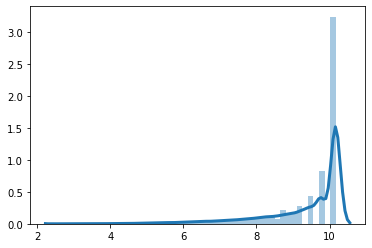

In [18]:
import seaborn as sns
sns.distplot(list_idf, kde = True,
                 kde_kws = {'linewidth': 3})

In [19]:
token_list = []
count = 0
for i in token_dict.keys():
     if token_dict[i]<=10:
            token_list.append(i)
            count+=1
count

12742

In [20]:
word_list =[]
new_tweets = []
for w in token_list:
    for i in range(0,len(final_text)):
        word_list=[]
        if w in final_text[i].split():
            
                word_list.append(final_text[i])
        else:
            continue
            
                
        if len(word_list) !=0 and word_list not in new_tweets:
            new_tweets.append(word_list)
        

In [21]:
len(new_tweets)

49931

In [34]:
new_df = pd.DataFrame(new_tweets)
new_df.to_csv("new_tweets.csv",index = False, header=False)

In [22]:
def vectorization(Stringfit,Stringtransform):
    count = []
    vectorizer = CountVectorizer(min_df=5)
    String_df = pd.DataFrame(Stringfit)
    Stringtransform_df = pd.DataFrame(Stringtransform)
    vectorizer.fit(String_df[0])
    countmatrix = vectorizer.transform(Stringtransform_df[0])
    count=countmatrix.todense()
    return count,vectorizer.get_feature_names()

vector_1,a1 = vectorization(new_tweets,new_tweets)

In [24]:
len(a1)

6916

In [25]:
vector_transpose = np.transpose(vector_1)


In [26]:
import tensorflow as tf

In [27]:
vector_tf=tf.convert_to_tensor(vector_1, dtype=None, dtype_hint=None, name=None)
vector_t_tf=tf.convert_to_tensor(vector_transpose, dtype=None, dtype_hint=None, name=None)

result = tf.matmul(vector_t_tf,vector_tf)

In [28]:
result_arr=result.numpy()

In [29]:
index_ = []
for i in range (len(a1)):
     for j in range (0,len(a1)):
        if result_arr[i][j] >100 and j<i:
            index_.append([result_arr[i][j],i,j])

In [30]:
list_freq = []
for i in range (len(index_)):
    list_freq.append(index_[i][0])

In [31]:
len(list_freq)

619

In [32]:
x = np.array(list_freq) 
print(np.unique(x)) 

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 175 176 177 178 179 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 206 207 208 210 211 214
 215 216 217 219 220 223 224 225 227 228 229 230 231 232 233 234 236 237
 238 239 240 243 244 246 248 249 252 253 254 255 256 257 259 260 268 271
 273 274 275 276 277 287 289 290 294 297 301 302 303 305 306 308 312 316
 317 325 330 335 337 342 346 353 366 374 381 389 432 444 449 453 499 512
 520]


In [33]:
co_occur = []
for i in range (len(index_)):
    a = index_[i][1]
    b = index_[i][2]
    co_occur.append([a1[a],a1[b],index_[i][0]])
                

In [34]:
co_occur

[['amp', 'also', 130],
 ['amp', 'alway', 102],
 ['back', 'amp', 146],
 ['come', 'amp', 109],
 ['come', 'back', 101],
 ['day', 'amp', 200],
 ['day', 'back', 123],
 ['els', 'anyon', 112],
 ['even', 'amp', 185],
 ['even', 'day', 104],
 ['even', 'dont', 152],
 ['feel', 'also', 135],
 ['feel', 'amp', 155],
 ['feel', 'bad', 132],
 ['feel', 'better', 153],
 ['feel', 'day', 130],
 ['feel', 'dont', 155],
 ['feel', 'even', 173],
 ['friend', 'amp', 117],
 ['fuck', 'amp', 111],
 ['fuck', 'dont', 127],
 ['fuck', 'even', 105],
 ['game', 'amp', 103],
 ['get', 'actual', 112],
 ['get', 'also', 220],
 ['get', 'alway', 146],
 ['get', 'amp', 381],
 ['get', 'back', 271],
 ['get', 'bad', 111],
 ['get', 'better', 171],
 ['get', 'call', 104],
 ['get', 'cant', 107],
 ['get', 'care', 104],
 ['get', 'come', 136],
 ['get', 'day', 253],
 ['get', 'done', 125],
 ['get', 'dont', 237],
 ['get', 'even', 294],
 ['get', 'feel', 255],
 ['get', 'first', 106],
 ['get', 'friend', 102],
 ['get', 'fuck', 194],
 ['get', 'game',

In [35]:
co_occur_df=pd.DataFrame(co_occur)
co_occur_df.to_csv("cooccuring_100.csv",header= False, index = False)

# Non-Depressed Users

In [40]:
usernames_nd = pd.read_csv('usernames_nondepressed.txt',index_col= False,header=None,sep='\t',error_bad_lines=False)


In [41]:
rowcount_nd = len(usernames_nd.axes[0])

In [42]:
usernames_nd=usernames_nd.values.tolist()


In [43]:
dep_tweets_nd = []

for i in range (0,rowcount_nd):
    try:
    
        filename=r"C:\Users\Manjusha Pattadkal\Documents\ML Project\non depressed\2 months\userdata_"+usernames_nd[i][0]+"_2_months.csv"

    
    
        tweets=pd.read_csv(filename,encoding='mbcs')
        tweets.dropna(subset = ['twittername'],inplace=True)

        row=len(tweets.axes[0])
        
        for i in range (0,row):
            dep_tweets_nd.append(str(tweets.iloc[i,4]))
            

    except:
        pass

In [44]:
clean_nd = preprocess(dep_tweets_nd,tweet_clean_tp)
tags_nd = preprocess(clean_nd,pos_tags)
nan_value = float("NaN")
tags_nd.replace("",nan_value, inplace=True)
tags_nd.dropna(inplace=True)
tags_nd=tags_nd.reset_index(drop=True)

rowc = len(tags_nd)

In [45]:
final_text_nd = []
for i in range(0,rowc):
    final_text_nd.append(str(preprocessing(tags_nd[i])))

In [46]:
x = pd.Series(final_text_nd)

for i in range(len(final_text_nd)):
    tokens=final_text_nd[i].split()
    if len(tokens)==1:
        x.drop(i,inplace=True)

final_text_nd=x.reset_index(drop=True)

In [47]:

DF = {}
for i in range(len(final_text_nd)):
    tokens = final_text_nd[i].split()
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

In [48]:
def doc_freq(token):
    return len(DF[token])

In [49]:
token_dict = {}
for i in range(len(final_text_nd)):
    tokens = final_text_nd[i].split()
    #counter = Counter(tokens + final_text[i])
    for token in np.unique(tokens):
        #tf = counter[token]/words_count
        df = doc_freq(token)
        token_dict[token] = np.log(len(final_text_nd)/(df+1))

In [50]:
list_idf = []
for i in token_dict.keys():
 list_idf.append(token_dict[i])

In [51]:
import seaborn as sns

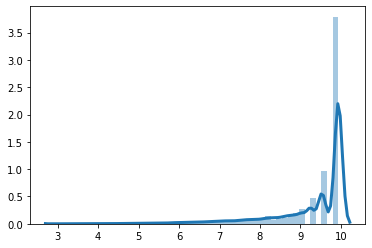

In [52]:
sns.distplot(list_idf, kde = True,
                 kde_kws = {'linewidth': 3})

In [53]:
token_list = []
count=0
for i in token_dict.keys():
     if token_dict[i]<=9.8:
            token_list.append(i)
            count+=1
count

12476

In [65]:
word_list =[]
new_tweets = []
for w in token_list:
    for i in range(0,len(final_text_nd)):
        word_list=[]
        if w in final_text_nd[i].split():
            
                word_list.append(final_text_nd[i])
        else:
            continue
            
                
        if len(word_list) !=0 and word_list not in new_tweets:
            new_tweets.append(word_list)
        

In [66]:
def vectorization(Stringfit,Stringtransform):
    count = []
    vectorizer = CountVectorizer(min_df=5)
    String_df = pd.DataFrame(Stringfit)
    Stringtransform_df = pd.DataFrame(Stringtransform)
    vectorizer.fit(String_df[0])
    countmatrix = vectorizer.transform(Stringtransform_df[0])
    count=countmatrix.todense()
    return count,vectorizer.get_feature_names()

vector_1,a1 = vectorization(new_tweets,new_tweets)

In [67]:
len(a1)

6103

In [68]:
vector_transpose = np.transpose(vector_1)

In [69]:
import tensorflow as tf

In [70]:
vector_tf=tf.convert_to_tensor(vector_1, dtype=None, dtype_hint=None, name=None)
vector_t_tf=tf.convert_to_tensor(vector_transpose, dtype=None, dtype_hint=None, name=None)

result = tf.matmul(vector_t_tf,vector_tf)

In [71]:
result_arr=result.numpy()

In [79]:
index_ = []
for i in range (len(a1)):
     for j in range (0,len(a1)):
        if result_arr[i][j] >100 and j<i:
            index_.append([result_arr[i][j],i,j])

In [80]:
list_freq = []
for i in range (len(index_)):
    list_freq.append(index_[i][0])

In [81]:
len(list_freq)

152

In [82]:
x = np.array(list_freq) 
print(np.unique(x)) 

[101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118 119
 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135 137 138 141
 142 143 145 146 147 150 151 152 155 156 160 161 165 166 167 169 175 177
 179 183 185 186 188 189 194 197 199 201 202 204 214 231 232 250 256 260
 262 263 264 279 323 328 334 341 346 365 372 374 383 392 403 423 495 746]


In [83]:
co_occur_nd = []
for i in range (len(index_)):
    a = index_[i][1]
    b = index_[i][2]
    co_occur_nd.append([a1[a],a1[b],index_[i][0]])

In [84]:
co_occur_nd_df=pd.DataFrame(co_occur_nd)
co_occur_nd_df.to_csv("cooccuring_nd.csv",header= False, index = False)